### Does Voter Turnout affect the following two columns?
#### Chance that the incumbent will win the popular vote (popwin_inc) -and- Chance that the challenger will win the popular vote (popwin_chal)
### My Hypothesis is that voter turnout will indeed affect the incumbent and challenger's chances to win the popular vote.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('presidential_national_toplines_2020.csv')
df.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,ecwin_inc,ecwin_chal,ecwin_3rd,...,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,national_voteshare_3rd_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,11/3/2020,Trump,Biden,NaN,0.103900,0.891600,NaN,...,1.842986,42.91262,50.87952,NaN,0.724433,157972048.0,168424640.0,147487920.0,00:00:48 3 Nov 2020,40000
1,2020,President,polls-plus,11/2/2020,Trump,Biden,NaN,0.102675,0.893200,NaN,...,1.842986,42.91348,50.88025,NaN,0.724433,157972048.0,168424640.0,147487920.0,23:45:03 2 Nov 2020,40000
2,2020,President,polls-plus,11/1/2020,Trump,Biden,NaN,0.102850,0.892825,NaN,...,1.823490,43.03094,50.77527,NaN,0.689592,157737856.0,168190448.0,147253728.0,23:11:03 1 Nov 2020,40000
3,2020,President,polls-plus,10/31/2020,Trump,Biden,NaN,0.105625,0.888300,NaN,...,1.835479,42.98096,50.74764,NaN,0.689802,158044784.0,168497376.0,147560672.0,22:23:03 31 Oct 2020,40000
4,2020,President,polls-plus,10/30/2020,Trump,Biden,NaN,0.099625,0.895800,NaN,...,1.847821,42.92510,50.72821,NaN,0.692837,156723120.0,167175712.0,146239008.0,21:34:03 30 Oct 2020,40000


In [3]:
df.isnull().sum() 

cycle                           0
branch                          0
model                           0
modeldate                       0
candidate_inc                   0
candidate_chal                  0
candidate_3rd                 156
ecwin_inc                       0
ecwin_chal                      0
ecwin_3rd                     156
ec_nomajority                   0
popwin_inc                      0
popwin_chal                     0
popwin_3rd                    156
ev_inc                          0
ev_chal                         0
ev_3rd                        156
ev_inc_hi                       0
ev_chal_hi                      0
ev_3rd_hi                     156
ev_inc_lo                       0
ev_chal_lo                      0
ev_3rd_lo                     156
national_voteshare_inc          0
national_voteshare_chal         0
national_voteshare_3rd        156
nat_voteshare_other             0
national_voteshare_inc_hi       0
national_voteshare_chal_hi      0
national_votes

In [4]:
x = sum(df.isnull().sum())
x

1695

In [5]:
y = df.shape[0]*df.shape[1]
y

6240

In [6]:
x/y * 100 #percent of data missing

27.163461538461537

In [7]:
df.shape

(156, 40)

In [8]:
df.drop(['candidate_3rd','ecwin_3rd','popwin_3rd','ev_3rd','ev_3rd_hi','ev_3rd_lo','national_voteshare_3rd','national_voteshare_3rd_hi','national_voteshare_3rd_lo'], axis = 1, inplace = True)
df.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,ecwin_inc,ecwin_chal,ec_nomajority,popwin_inc,...,national_voteshare_chal_hi,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,nat_voteshare_other_lo,national_turnout,national_turnout_hi,national_turnout_lo,timestamp,simulations
0,2020,President,polls-plus,11/3/2020,Trump,Biden,0.103900,0.891600,0.004500,0.025700,...,55.83899,1.842986,42.91262,50.87952,0.724433,157972048.0,168424640.0,147487920.0,00:00:48 3 Nov 2020,40000
1,2020,President,polls-plus,11/2/2020,Trump,Biden,0.102675,0.893200,0.004125,0.025625,...,55.83824,1.842986,42.91348,50.88025,0.724433,157972048.0,168424640.0,147487920.0,23:45:03 2 Nov 2020,40000
2,2020,President,polls-plus,11/1/2020,Trump,Biden,0.102850,0.892825,0.004325,0.028900,...,55.76475,1.823490,43.03094,50.77527,0.689592,157737856.0,168190448.0,147253728.0,23:11:03 1 Nov 2020,40000
3,2020,President,polls-plus,10/31/2020,Trump,Biden,0.105625,0.888300,0.006075,0.029525,...,55.80073,1.835479,42.98096,50.74764,0.689802,158044784.0,168497376.0,147560672.0,22:23:03 31 Oct 2020,40000
4,2020,President,polls-plus,10/30/2020,Trump,Biden,0.099625,0.895800,0.004575,0.030175,...,55.84821,1.847821,42.92510,50.72821,0.692837,156723120.0,167175712.0,146239008.0,21:34:03 30 Oct 2020,40000


In [9]:
df.columns

Index(['cycle', 'branch', 'model', 'modeldate', 'candidate_inc',
       'candidate_chal', 'ecwin_inc', 'ecwin_chal', 'ec_nomajority',
       'popwin_inc', 'popwin_chal', 'ev_inc', 'ev_chal', 'ev_inc_hi',
       'ev_chal_hi', 'ev_inc_lo', 'ev_chal_lo', 'national_voteshare_inc',
       'national_voteshare_chal', 'nat_voteshare_other',
       'national_voteshare_inc_hi', 'national_voteshare_chal_hi',
       'nat_voteshare_other_hi', 'national_voteshare_inc_lo',
       'national_voteshare_chal_lo', 'nat_voteshare_other_lo',
       'national_turnout', 'national_turnout_hi', 'national_turnout_lo',
       'timestamp', 'simulations'],
      dtype='object')

In [10]:
df.loc[0]['popwin_inc']+df.loc[0]['popwin_chal']

1.0

Text(0.5, 1.0, '% Chance that the challenger will win the popular vote')

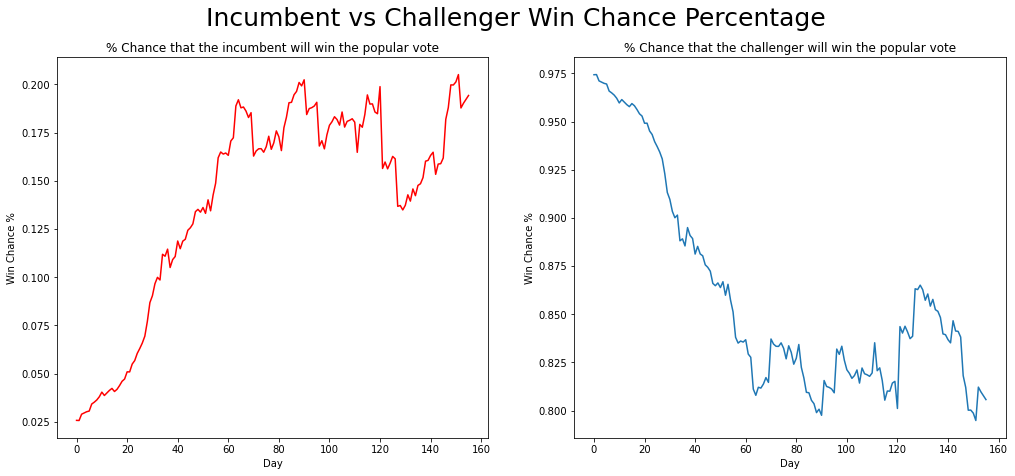

In [11]:
fig = plt.figure(figsize = (17,7))
axis1 = fig.add_subplot(1,2,1)
axis2 = fig.add_subplot(1,2,2)


fig.suptitle('Incumbent vs Challenger Win Chance Percentage', fontsize = 25)

axis1.plot(df['popwin_inc'], color = 'red')
axis1.set_xlabel('Day')
axis1.set_ylabel('Win Chance %')
axis1.set_title('% Chance that the incumbent will win the popular vote')

axis2.plot(df['popwin_chal'])
axis2.set_xlabel('Day')
axis2.set_ylabel('Win Chance %')
axis2.set_title('% Chance that the challenger will win the popular vote')


Text(0.5, 1.0, 'National Turnout Upper vs Lower Bounds')

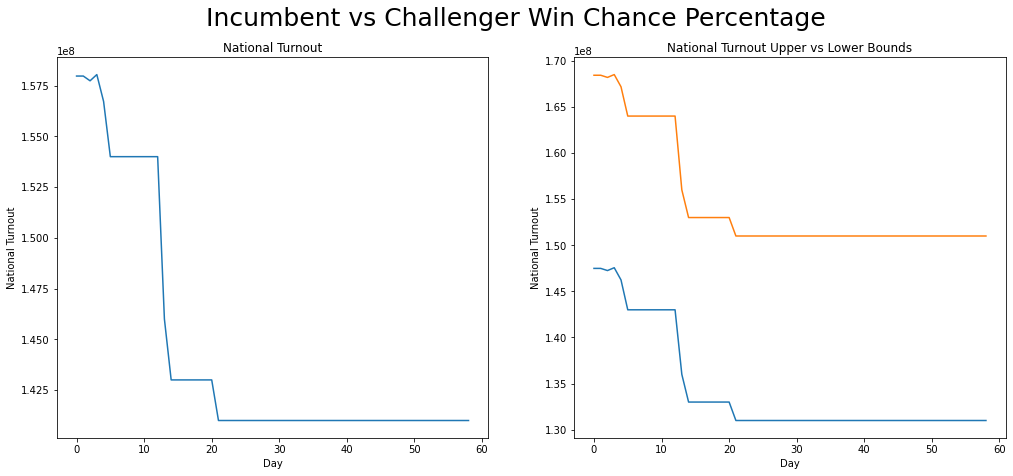

In [17]:
fig = plt.figure(figsize = (17,7))
axis1 = fig.add_subplot(1,2,1)
axis2 = fig.add_subplot(1,2,2)

fig.suptitle('Incumbent vs Challenger Win Chance Percentage', fontsize = 25)

axis1.plot(df['national_turnout'])
axis1.set_xlabel('Day')
axis1.set_ylabel('National Turnout')
axis1.set_title('National Turnout')

axis2.plot(df['national_turnout_lo'])


axis2.plot(df['national_turnout_hi'])
axis2.set_xlabel('Day')
axis2.set_ylabel('National Turnout')
axis2.set_title('National Turnout Upper vs Lower Bounds')

### Purely by visualizing the graphs, it appears that as the national turnout grows smaller, the incumbents chances of winning the popular vote increases.
#### This does not truly mean they are related, but at first glance it appears that they at least could be